In [265]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 让图片中可以显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
# 让图片中可以显示负号
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv("电子产品销售分析.csv", encoding="UTF-8", index_col=0)


In [266]:
#查看数据
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564169 entries, 0 to 2633520
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     564169 non-null  object 
 1   order_id       564169 non-null  int64  
 2   product_id     564169 non-null  int64  
 3   category_id    564169 non-null  float64
 4   category_code  434799 non-null  object 
 5   brand          536945 non-null  object 
 6   price          564169 non-null  float64
 7   user_id        564169 non-null  float64
 8   age            564169 non-null  float64
 9   sex            564169 non-null  object 
 10  local          564169 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 51.7+ MB


order_id    product_id   category_id          price       user_id  \
count  5.641690e+05  5.641690e+05  5.641690e+05  564169.000000  5.641690e+05   
mean   2.370552e+18  1.695711e+18  2.272919e+18     208.269324  1.515916e+18   
std    2.025138e+16  3.290688e+17  2.158282e+16     304.559875  2.377083e+07   
min    2.294360e+18  1.515966e+18  2.268105e+18       0.000000  1.515916e+18   
25%    2.353294e+18  1.515966e+18  2.268105e+18      23.130000  1.515916e+18   
50%    2.376886e+18  1.515966e+18  2.268105e+18      87.940000  1.515916e+18   
75%    2.388441e+18  1.515966e+18  2.268105e+18     277.750000  1.515916e+18   
max    2.388441e+18  2.388434e+18  2.374499e+18   18328.680000  1.515916e+18   

                 age  
count  564169.000000  
mean       33.184388  
std        10.122088  
min        16.000000  
25%        24.000000  
50%        33.000000  
75%        42.000000  
max        50.000000

In [267]:
# 数据清洗
df['event_time'] = pd.to_datetime(df['event_time'].str[:19],format="%Y-%m-%d %H:%M:%S")
# 添加列，方便后面数据分析
df['Month'] = df['event_time'].dt.month
df['Day'] = df['event_time'].dt.day
df['Dayofweek'] = df['event_time'].dt.dayofweek
df['hour'] = df['event_time'].dt.hour


In [252]:
# 统计空值
df.isnull().sum()
# df.fillna("missing",inplace=True)
df['brand'].fillna('missing',inplace=True)
df['category_code'].fillna('missing',inplace=True)
df.isnull().sum()

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
age              0
sex              0
local            0
Month            0
Day              0
Dayofweek        0
hour             0
dtype: int64

In [174]:
#重复值
df.duplicated(keep="last")
# 删除重复值
df.drop_duplicates(subset=["order_id","user_id"],keep="last")

event_time             order_id           product_id  \
1       2020-04-24 11:50:39  2294359932054536986  1515966223509089906   
3       2020-04-24 14:37:43  2294444024058086220  2273948319057183658   
4       2020-04-24 19:16:21  2294584263154074236  2273948316817424439   
5       2020-04-26 08:45:57  2295716521449619559  1515966223509261697   
9       2020-04-26 09:33:47  2295740594749702229  1515966223509104892   
...                     ...                  ...                  ...   
2633513 2020-11-21 10:08:14  2388440981134693940  2273948246856434093   
2633515 2020-11-21 10:08:54  2388440981134693941  1515966223509088622   
2633516 2020-11-21 10:10:01  2388440981134693942  1515966223526602848   
2633517 2020-11-21 10:10:13  2388440981134693943  1515966223509089282   
2633520 2020-11-21 10:10:30  2388440981134693944  1515966223509127566   

          category_id                category_code    brand    price  \
1        2.268105e+18           electronics.tablet  samsung   162.01   
3        2.268105e+18  electronics.audio.headphone   huawei    77.52   
4        2.268105e+18                      missing  karcher   217.57   
5        2.268105e+18      furniture.kitchen.table  maestro    39.33   
9        2.268105e+18       electronics.smartphone    apple  1387.01   
...               ...                          ...      ...      ...   
2633513  2.268105e+18                      missing   xiaomi    16.18   
2633515  2.374499e+18         electronics.video.tv       lg   370.35   
2633516  2.268105e+18       electronics.smartphone     oppo   138.87   
2633517  2.268105e+18       electronics.smartphone    apple   418.96   
2633520  2.268105e+18   appliances.kitchen.blender  redmond    53.22   

              user_id   age sex local  Month  Day  Dayofweek  hour  
1        1.515916e+18  24.0   女    海南      4   24          4    11  
3        1.515916e+18  38.0   女    北京      4   24          4    14  
4        1.515916e+18  32.0   女    广东      4   24          4    19  
5        1.515916e+18  20.0   男    重庆      4   26          6     8  
9        1.515916e+18  21.0   男    北京      4   26          6     9  
...               ...   ...  ..   ...    ...  ...        ...   ...  
2633513  1.515916e+18  39.0   女    广东     11   21          5    10  
2633515  1.515916e+18  25.0   女    上海     11   21          5    10  
2633516  1.515916e+18  21.0   男    上海     11   21          5    10  
2633517  1.515916e+18  21.0   女    北京     11   21          5    10  
2633520  1.515916e+18  19.0   女    上海     11   21          5    10  

[400538 rows x 15 columns]

In [175]:
def store_plot(data,xlab,ylab,title):
	# 画布
	plt.figure(figsize=(10,5))
	# data Series类型
	plt.plot(data)
	# x的显示
	plt.xlabel(xlab)
	# y轴的显示
	plt.ylabel(ylab)
	# 标题
	plt.title(title)

In [176]:
# 分析  每月销售金额
data = df[df["price"]>0].groupby(by="Month")["price"].sum()
data
store_plot(data,"月份","成交额","每月销售额")

KeyboardInterrupt: 

In [ ]:
df[df['price']>0].groupby('Month')['price'].agg(["max","min",'mean'])


In [ ]:
data=df[df['price']>0].groupby('Month')['price'].agg(["max","min",'mean'])
data
store_plot(data,
xlab='月份',
ylab='成交金额哇',
title='每月成交金额')

In [ ]:
# 每月消费人数
# data = df[df["price"]>0].groupby("Month")["user_id"].sum()
data = df[df["price"]>0].groupby("Month")["user_id"].nunique()
data
store_plot(data,xlab="月份",ylab="人数",title="每月消费人数")

In [ ]:
#每月订单数量
data = df[df["price"]>0].groupby("Month")["order_id"].nunique()
data
store_plot(data,xlab="月份",ylab="订单数量",title="每月订单数量")

In [ ]:
#每月客单价（每个月客户下单的平均价格）
# 1000/ 客单价333
data1 = df[df["price"]>0].groupby(by="Month")["price"].sum()
data2 = df[df["price"]>0].groupby(by="Month")["user_id"].nunique()
store_plot(data1/data2,xlab="月份",ylab="客单价",title="每月客单价")

In [ ]:
# 不同省份用户数量
data = df.groupby(by="local")["user_id"].nunique().sort_values(ascending=False)
index = data.index
values = data.values

for x,y in enumerate(zip(index,values)):
	plt.text(y[0],y[1],s=values[x],ha="center")
plt.bar(data.index,data.values)
plt.xlabel("省份")
plt.ylabel("用户数")
plt.title("不同省份用户数")

In [ ]:
#不同省份订单数量
data = df.groupby(by="local")["order_id"].nunique().sort_values(ascending=False)
index = data.index
values = data.values

for x,y in enumerate(zip(index,values)):
	plt.text(y[0],y[1],s=values[x],ha="center")
plt.bar(data.index,data.values)
plt.xlabel("省份")
plt.ylabel("订单数")
plt.title("不同省份订单数")

In [ ]:
#不同省份成交金额
data = df.groupby(by="local")["price"].sum().sort_values(ascending=False)
index = data.index
values = data.values

for x,y in enumerate(zip(index,values)):
	plt.text(y[1],y[0],s="{:.1f}万".format(values[x] / 10000),va="center")
plt.barh(data.index,data.values)
plt.ylabel("省份")
plt.xlabel("成交额")
plt.title("不同省份成交额")

In [ ]:
#下单星期分布
# 每星期成交的订单数
data = df.groupby("Dayofweek")["order_id"].nunique()
data
index = data.index
values = data.values
for x,y in enumerate(zip(index,values)):
	plt.text(y[0],y[1],s=values[x],ha="center")
plt.bar(data.index,data.values)
plt.xticks(np.arange(0, 7, 1),labels=["星期一","星期二","星期三","星期四","星期五","星期六","星期日"])
plt.xlabel("星期")
plt.ylabel("订单数")
plt.title("不同星期订单数")

In [ ]:
#下单小时分布
data = df.groupby("hour")["order_id"].nunique()
data
index = data.index
values = data.values
# for x,y in enumerate(zip(index,values)):
# 	plt.text(y[0],y[1],s=values[x],ha="center")
plt.plot(index,values)
plt.xticks(np.arange(0, 25, 1))
plt.xlabel("小时")
plt.ylabel("订单数")
plt.title("不同小时订单数")

In [ ]:
#用户消费次数、用户消费金额
# data1 = df.groupby("user_id")[["order_id"]].nunique()
# data2 = df.groupby("user_id")[["price"]].sum()
# data3 = data1.merge(data2,left_index=True,right_index=True)
# data3

#  第二种
data4 = df.groupby("user_id").agg({"order_id":"nunique","price":"sum"})
data4.describe()

In [ ]:
#消费次数与消费金额关系
data1 = df.groupby("user_id")[["order_id"]].nunique()
data2 = df.groupby("user_id")[["price"]].sum()

plt.scatter(data1,data2)
plt.xlabel("消费次数")
plt.ylabel("消费金额")
plt.title("用户消费次数和消费金额关系")

In [ ]:
#用户消费周期
"""
1	event_time
	2020-03-03   Nan
	2020-03-05    2
	2020-04-05   30

1   Nan
	2
	30

2   Nan
	3
	28

"""

# df[df["price"]>0].groupby("user_id").apply(lambda x:x["event_time"]-x["event_time"].shift()).describe()
from pandas import Series,DataFrame
DataFrame(df[df["price"]>0].groupby("user_id").apply(lambda x:x["event_time"]-x["event_time"].shift())).dropna().describe()

In [184]:
#新用户数量、活跃用户、不活跃用户、回流用户、回流率
pivoted_amount =df[df['price']>0].pivot_table(index='user_id',
columns='Month',
values='price',
aggfunc='mean').fillna(0)
# pivoted_amount
# array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
 #     dtype=object)


columns_month = df['Month'].sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
# # pivoted_amount
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase
#
# # #用户分层自定义函数
def active_status(data):
#存储当前用户的状态信息，如：unreg→未注册；unactive→未激活；new→新用户；return→回流用
	status =[]
	for i in range(11):  # 遍历0-10
		#若本月没有消费
		if data[i] ==0:
			# 列表中有状态信息，
			if len(status)>0:
				# 若上一个取值为未注册，那么，当前月份的状态也是“未注册”
				if status[i-1]=='unreg':
					status.append('unreg')
				else:
					status.append('unactive')
			# 列表中没有状态信息
			else:
				#将用户的状态置为“未注册”
				status.append('unreg')
			#若本月消费
		else:
			if len(status)==0:
				status.append('new')
			else:
				if status[i-1]=='unactive':
					status.append('return')
				elif status[i-1]=='unreg':
					status.append('new')
				else:
					status.append('active')
	return pd.Series(status,index=columns_month)
pivoted_purchase_status = pivoted_purchase.apply(lambda x:active_status(x),axis=1)
pivoted_purchase_status


1      2      3      4      5         6       7         8  \
user_id                                                                       
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg     new  unactive   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg    new    active  active  unactive   
1.515916e+18  unreg  unreg  unreg  unreg    new  unactive  return  unactive   
...             ...    ...    ...    ...    ...       ...     ...       ...   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   

                     9        10        11  
user_id                                     
1.515916e+18  unactive  unactive  unactive  
1.515916e+18       new    active  unactive  
1.515916e+18     unreg       new    active  
1.515916e+18    return    active    active  
1.515916e+18  unactive  unactive  unactive  
...                ...       ...       ...  
1.515916e+18     unreg     unreg       new  
1.515916e+18     unreg     unreg       new  
1.515916e+18     unreg     unreg       new  
1.515916e+18     unreg     unreg       new  
1.515916e+18     unreg     unreg       new  

[93818 rows x 11 columns]

In [185]:
purchase_status_counts_tmp= pivoted_purchase_status.replace('unreg',np.NaN)
purchase_status_counts_tmp


1    2    3    4    5         6       7         8         9  \
user_id                                                                       
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     new  unactive  unactive   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       new   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   
1.515916e+18  NaN  NaN  NaN  NaN  new    active  active  unactive    return   
1.515916e+18  NaN  NaN  NaN  NaN  new  unactive  return  unactive  unactive   
...           ...  ...  ...  ...  ...       ...     ...       ...       ...   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   

                    10        11  
user_id                           
1.515916e+18  unactive  unactive  
1.515916e+18    active  unactive  
1.515916e+18       new    active  
1.515916e+18    active    active  
1.515916e+18  unactive  unactive  
...                ...       ...  
1.515916e+18       NaN       new  
1.515916e+18       NaN       new  
1.515916e+18       NaN       new  
1.515916e+18       NaN       new  
1.515916e+18       NaN       new  

[93818 rows x 11 columns]

In [186]:
purchase_status_counts=purchase_status_counts_tmp.apply(lambda x:pd.value_counts(x))
purchase_status_counts

1       2     3     4      5      6      7      8      9  \
active       NaN   671.0   847   822   1930   3755   4457   9016   7387   
new       1987.0  1627.0  1493  4239  14099   9075  22271  22232   8200   
return       NaN     NaN   283   457   1444   1315   3578   4363   4298   
unactive     NaN  1316.0  2484  3828   5972  18375  24485  41412  65338   

             10     11  
active     5084   3205  
new        5640   2955  
return     3868   2500  
unactive  76271  85158

Text(0.5, 1.0, '用户分层')

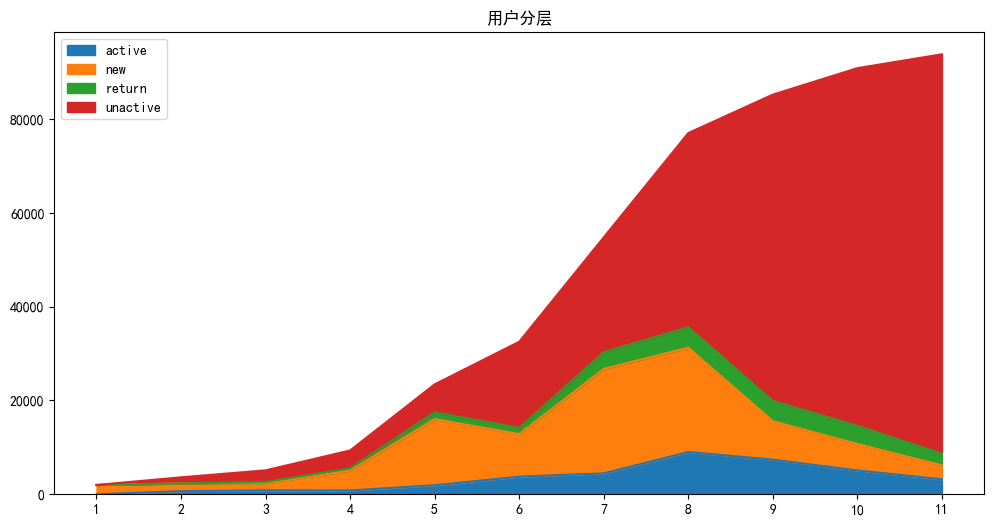

In [194]:
# data = purchase_status_counts.fillna(0).T
# plt.figure(dpi=100)
# plt.stackplot(data.index, data.active)
# plt.stackplot(data.index, data.new)
# plt.stackplot(data.index, data["return"])
# plt.stackplot(data.index, data["unactive"])

purchase_status_counts.fillna(0).T.plot.area(figsize=(12,6))
plt.xticks(range(11),columns_month)
plt.title('用户分层')

Text(0.5, 1.0, '回流率')

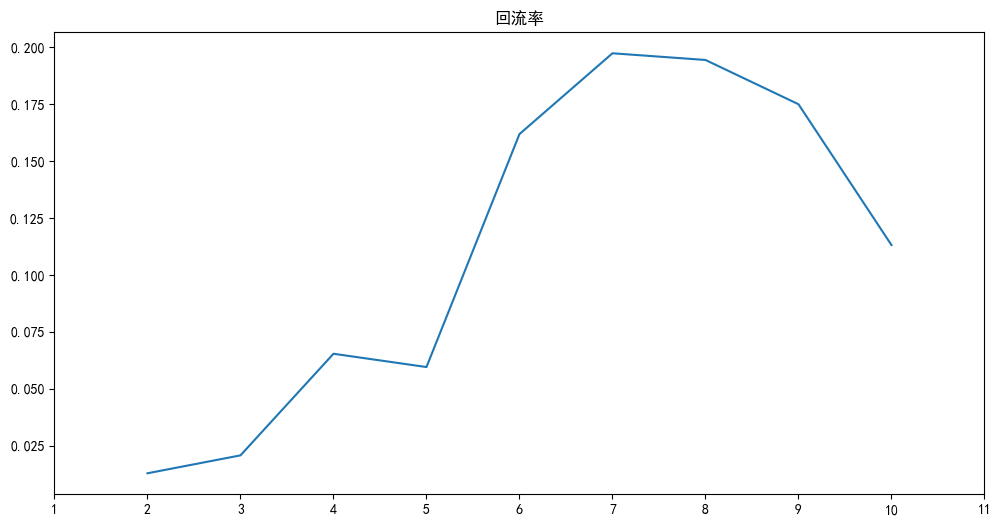

In [197]:
# 回流率
# 用每个月除以总数
return_rate = purchase_status_counts.apply(lambda x:x/x.sum(),axis=1)
#return_rate
return_rate.loc['return'].plot(figsize=(12,6))
plt.xticks(range(1,12),columns_month)
plt.title('回流率')


In [203]:
# 复购率
pivoted_counts = df[df['price']>0].pivot_table(index='user_id',
columns='Month',
values='order_id',
aggfunc='nunique').fillna(0)
pivoted_counts
columns_month = df['Month'].sort_values().astype('str').unique()
# # np.NaN if x==0 else 0 ← 若没有下单，单元格的取值设置为 NaN，否则，若为 1，将单元格的取值设
# #置为 0
# 消费2次及以上，记1 。 只能买一次记为0，没有买的Nan
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf
# # 每个月的复购率=每个月复购的用户数/总用户数,不算nan
# (pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize=(12,6))
# plt.xticks(range(11),columns_month)
# plt.title('复购率')


Month         1   2   3   4    5    6    7   8    9    10   11
user_id                                                       
1.515916e+18 NaN NaN NaN NaN  NaN  NaN  0.0 NaN  NaN  NaN  NaN
1.515916e+18 NaN NaN NaN NaN  NaN  NaN  NaN NaN  0.0  0.0  NaN
1.515916e+18 NaN NaN NaN NaN  NaN  NaN  NaN NaN  NaN  1.0  0.0
1.515916e+18 NaN NaN NaN NaN  1.0  0.0  1.0 NaN  1.0  1.0  1.0
1.515916e+18 NaN NaN NaN NaN  0.0  NaN  0.0 NaN  NaN  NaN  NaN
...           ..  ..  ..  ..  ...  ...  ...  ..  ...  ...  ...
1.515916e+18 NaN NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN  0.0
1.515916e+18 NaN NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN  0.0
1.515916e+18 NaN NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN  1.0
1.515916e+18 NaN NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN  0.0
1.515916e+18 NaN NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN  0.0

[93818 rows x 11 columns]

Text(0.5, 1.0, '回购率')

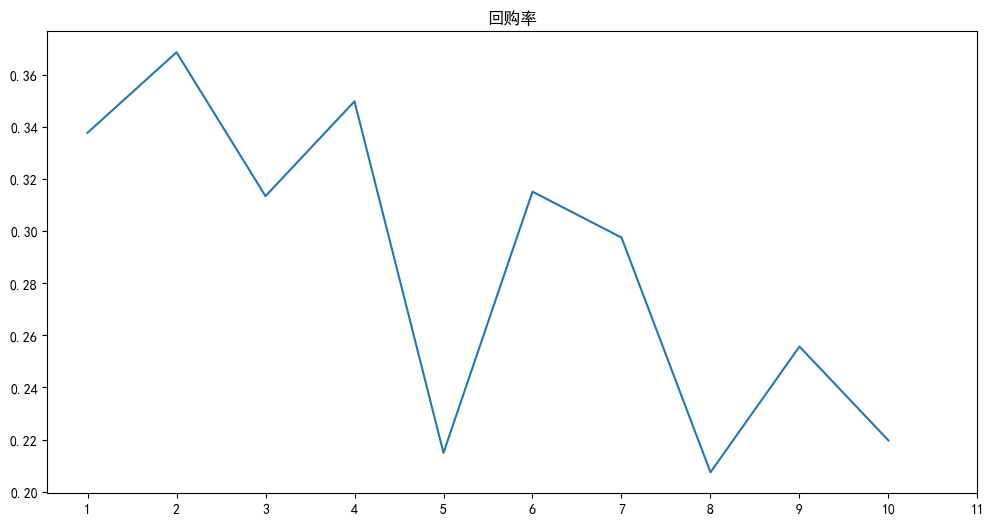

In [214]:
# pivoted_purchase
# 回购率
def purchase_return(data):
	status = []
	for i in range(10):
		if data[i]==1:
			if data[i+1]==1:
				#回购：当月若是下单了，且下月也下单了，那么，针对于单月发生了回购
				status.append(1)
			else:
				status.append(0)
		else :
			status.append(np.NaN)
	status.append(np.NaN) # 拼了11个月
	return pd.Series(status,index=columns_month)
pivoted_purchase_return = pivoted_purchase.apply(purchase_return,axis=1)
pivoted_purchase_return
# # 当月的回购率 = 当期月份总的回购数/当月的总用户数
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize=(12,6))
plt.xticks(range(11),columns_month)
plt.title('回购率')



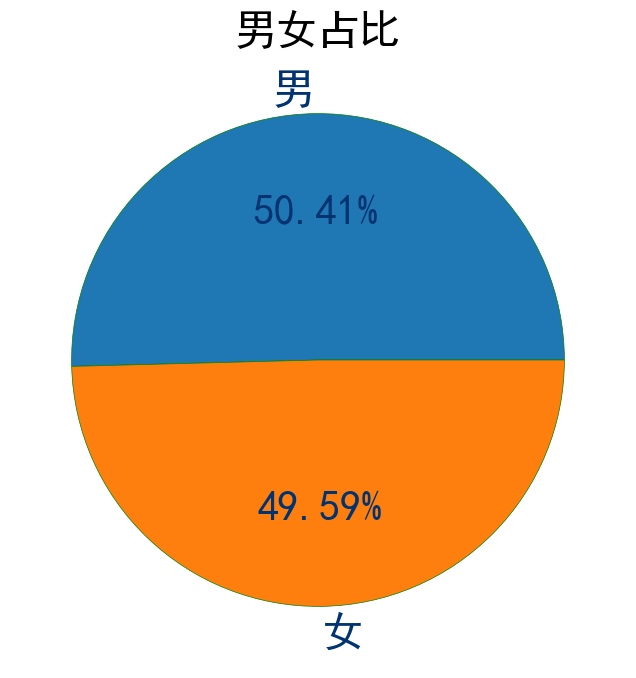

In [216]:
#按性别分析
df_sex = df['sex'].value_counts()
# df = df[df['price']>0]
plt.figure(figsize=(8,8))
# 绘制饼状图时，自动计算出比率值
plt.pie(df_sex.values,labels=df_sex.index,autopct='%.2f%%',
wedgeprops={'linewidth':0.5,'edgecolor':'green'},
textprops={'fontsize':30,'color':'#003371'}
)
plt.title('男女占比',size=30)
plt.show()


In [217]:
#按年龄段分析
df["age"].describe()

count    564169.000000
mean         33.184388
std          10.122088
min          16.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          50.000000
Name: age, dtype: float64

x=40-50,y=169576
x=20-30,y=159765
x=30-40,y=156569
x=10-20,y=78259


Text(0.5, 1.0, '不同年龄分段的购买情况')

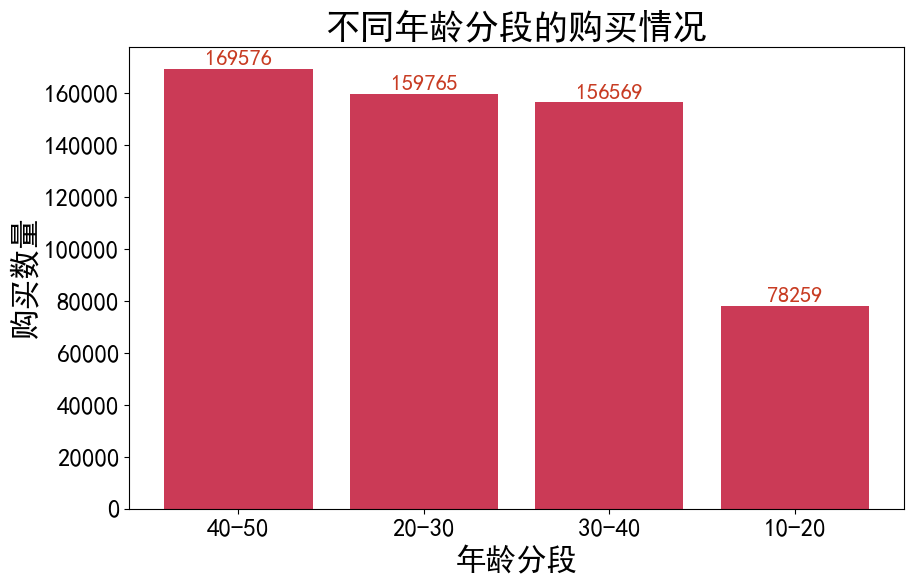

In [243]:
bins=[10,20,30,40,50]
df['age_box'] = pd.cut(df['age'],bins,labels=['10-20','20-30','30-40','40-50'])
age_box = df['age_box'].value_counts()
age_box
plt.figure(figsize=(10,6))
plt.bar(age_box.index,age_box.values
,color='#cb3a56')
plt.ylabel('购买数量',size=22)
plt.xlabel('年龄分段',size=22)
plt.xticks(size=18)
plt.yticks(size=18)
#print(age_box.index)
#print(age_box.values)
# print(zip(age_box.index,age_box.values))
for x,y in zip(age_box.index,age_box.values):
	print(f'x={x},y={y}')
	# 参数 1、参数 2 用来控制文字在柱子上书写的位置，参数 3 用来指定 y 轴上显示的数字
	plt.text(x,y+500,"%d"%y,ha='center',va='bottom',size=16,color='#c83c23')
plt.title('不同年龄分段的购买情况',size=25)


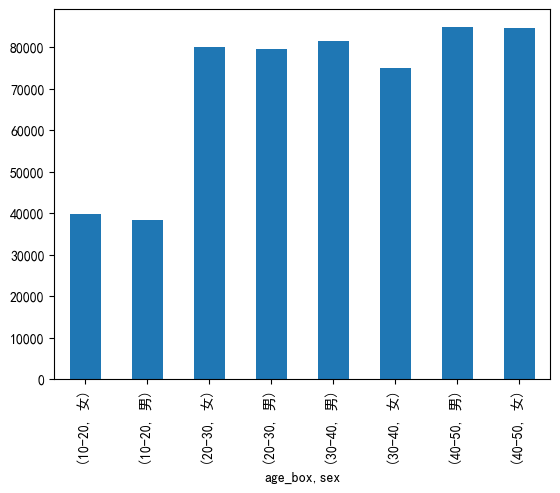

In [244]:
#每个年龄段男女分配的情况
data = df.groupby("age_box")["sex"].value_counts().plot.bar()

In [256]:
# 男女对品牌的影响
df_brand = df['brand'].value_counts().head(12)
df_brand

# 过滤在前12个品牌的数据
data1 = df['brand'].isin(df_brand.index)
data = df[df['brand'].isin(df_brand.index)]
data.groupby('sex').describe()['price']


count        mean         std  min    25%     50%    75%       max
sex                                                                       
女    143159.0  287.803168  346.130239  0.0  46.27  173.59  393.5   9606.48
男    144971.0  289.160965  356.548502  0.0  46.27  173.59  393.5  18328.68

In [246]:
df[df['brand'].isin(df_brand.index)].groupby('age_box').describe()['price']

count        mean         std   min    25%     50%     75%  \
age_box                                                                 
10-20    40064.0  288.570671  345.751456  0.02  48.59  173.59  393.50   
20-30    81558.0  291.910613  352.616028  0.00  46.27  173.59  395.81   
30-40    80539.0  289.742366  352.110786  0.00  46.27  173.59  393.50   
40-50    85969.0  284.021757  352.184105  0.00  46.27  162.01  381.92   

              max  
age_box            
10-20     7407.38  
20-30     9606.48  
30-40    11574.05  
40-50    18328.68

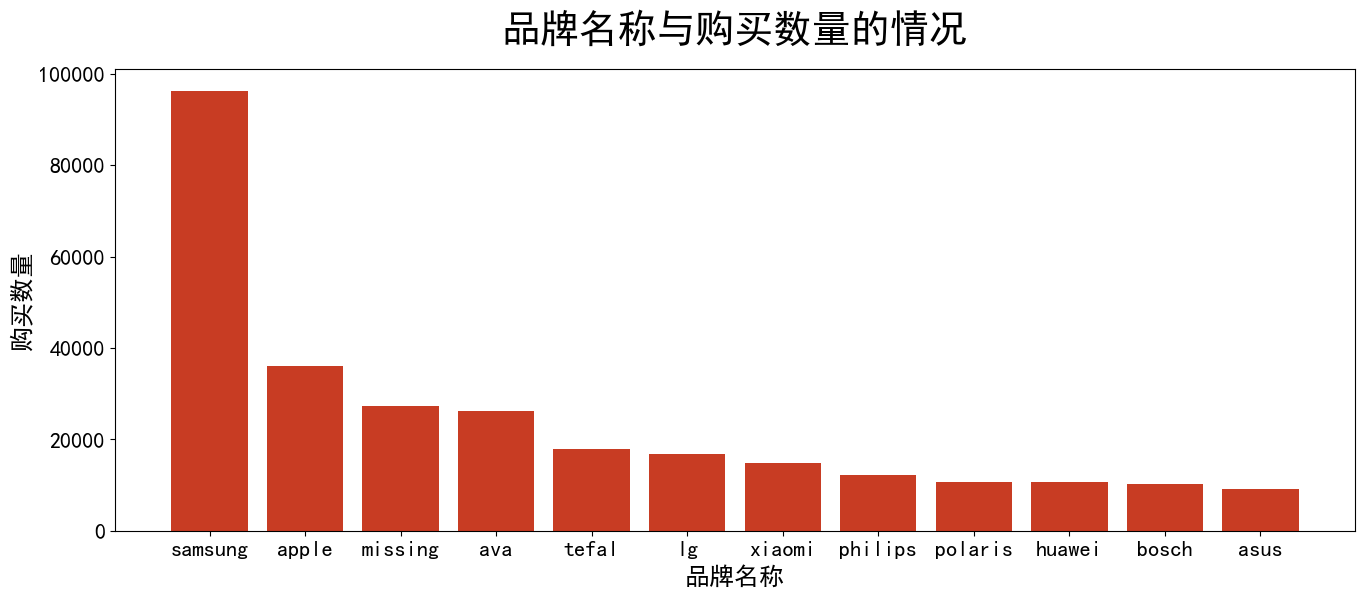

In [254]:
#按喜好品牌分析
plt.figure(figsize=(16,6))
plt.bar(df_brand.index,df_brand.values,color='#c83c23')
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("品牌名称",size=18)
plt.ylabel("购买数量",size=18)
plt.title('品牌名称与购买数量的情况',size=28,pad=20)
plt.show()

In [271]:
df['price'].quantile([0,0.25,0.5,0.75,1]).tolist()
df['price_box'] = pd.cut(df['price'],df['price'].quantile([0,0.25,0.5,0.75,1]).tolist()
,labels=['0.02-23.13','23.13-87.94','87.94-277.75','277.75-18328.68'])
# df
df['price_box'].value_counts()


0.02-23.13         148200
87.94-277.75       142358
277.75-18328.68    139399
23.13-87.94        134173
Name: price_box, dtype: int64

In [272]:
#各品牌价格分布情况介绍
df[df['brand'].isin(df_brand.index)].groupby('brand').describe()['price']

count        mean         std    min     25%     50%     75%  \
brand                                                                     
apple    36084.0  720.514260  475.576531   2.29  324.05  740.72  925.67   
asus      9118.0  556.995058  348.708996  13.87  305.53  509.24  763.87   
ava      26123.0   75.383470   99.421969   0.02   11.55   41.64  138.87   
bosch    10206.0  327.873193  246.052661   4.84  133.54  300.90  462.94   
huawei   10722.0  207.689580  156.018227   3.22  127.29  162.01  254.61   
lg       16696.0  468.235000  332.623621  16.18  300.90  407.38  543.96   
philips  12151.0   83.750141  102.258354   1.60   37.01   50.90   87.94   
polaris  10730.0   40.508892   25.025027   4.61   23.13   37.01   47.20   
samsung  96239.0  300.793594  300.416010   0.02  115.72  208.31  381.92   
tefal    17956.0   86.487347   96.431385   2.99   25.44   55.53  105.30   
xiaomi   14881.0  160.913594  121.458886   0.00   46.27  162.01  231.46   

              max  
brand              
apple     6018.50  
asus      4629.61  
ava       1273.13  
bosch     1527.75  
huawei    1157.38  
lg       11574.05  
philips   1157.38  
polaris    313.63  
samsung  10416.64  
tefal      648.13  
xiaomi    2314.79

In [273]:
#各个订单总价分布情况
df.groupby('order_id')[['price']].sum().describe()

price
count  400538.000000
mean      293.353181
std       397.066671
min         0.000000
25%        41.640000
50%       148.225000
75%       393.500000
max     18699.030000